In [1]:
%pprint

Pretty printing has been turned OFF


## 2016 Election Project 

This notebook is intended to document my attempts at NER annotation of my data throughout this project. The data I am starting out with are transcripts of the presidential debates from the 2016 US Election between Hillary Clinton and Donald Trump. The transcripts were taken from UCSB's American Presidency Project:

Presidential Candidates Debates: "Presidential Debate at the University of Nevada in Las Vegas," October 19, 2016. Online by Gerhard Peters and John T. Woolley, The American Presidency Project. http://www.presidency.ucsb.edu/ws/?pid=119039.

Presidential Candidates Debates: "Presidential Debate at Washington University in St. Louis, Missouri," October 9, 2016. Online by Gerhard Peters and John T. Woolley, The American Presidency Project. http://www.presidency.ucsb.edu/ws/?pid=119038.

Presidential Candidates Debates: "Presidential Debate at Hofstra University in Hempstead, New York," September 26, 2016. Online by Gerhard Peters and John T. Woolley, The American Presidency Project. http://www.presidency.ucsb.edu/ws/?pid=118971.

I will eventually use the primary debate transcripts as well.

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import glob
import os

In [3]:
os.chdir('/Users/Paige/Documents/Data_Science/2016-Election-Project/data/Debates')
files = glob.glob("*.txt")
files

['10-19-16.txt', '10-9-16.txt', '9-26-16.txt']

In [4]:
#I'm creating a list where each entry in the list is a transcript
transcripts = []
for f in files:
    fi = open(f, 'r')
    txt = fi.read()
    fi.close
    transcripts.append(txt)

In [5]:
print(transcripts[0][:200])

PARTICIPANTS:
Former Secretary of State Hillary Clinton (D) and
Businessman Donald Trump (R)
MODERATOR:
Chris Wallace (Fox News)

WALLACE: Good evening from the Thomas and Mack Center at the Universit


**Let's start out with one transcript and see what we can get working. I plan on trying NLTK's nltk.ne_chunk_sents() to do annotation. I don't know how well it will work for conversational data in this format, but I'll try it out because it's a simple place to start.**

In [6]:
debate1 = transcripts[2]
print(debate1[:500])

PARTICIPANTS:
Former Secretary of State Hillary Clinton (D) and
Businessman Donald Trump (R)
MODERATOR:
Lester Holt (NBC News)

HOLT: Good evening from Hofstra University in Hempstead, New York. I'm Lester Holt, anchor of "NBC Nightly News." I want to welcome you to the first presidential debate.

The participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight'


In [7]:
#Sentence tokenization
d1sents = nltk.sent_tokenize(debate1)
d1sents[:6]
#For now, I'm not going to touch that top bit with the debate information and see what happens. It will most likely need cleaning up

['PARTICIPANTS:\nFormer Secretary of State Hillary Clinton (D) and\nBusinessman Donald Trump (R)\nMODERATOR:\nLester Holt (NBC News)\n\nHOLT: Good evening from Hofstra University in Hempstead, New York.', 'I\'m Lester Holt, anchor of "NBC Nightly News."', 'I want to welcome you to the first presidential debate.', 'The participants tonight are Donald Trump and Hillary Clinton.', 'This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization.', "The commission drafted tonight's format, and the rules have been agreed to by the campaigns."]

In [10]:
#Word tokenization in each sentence
d1toks_sents = [nltk.word_tokenize(sent) for sent in d1sents]
d1toks_sents[0:3]

[['PARTICIPANTS', ':', 'Former', 'Secretary', 'of', 'State', 'Hillary', 'Clinton', '(', 'D', ')', 'and', 'Businessman', 'Donald', 'Trump', '(', 'R', ')', 'MODERATOR', ':', 'Lester', 'Holt', '(', 'NBC', 'News', ')', 'HOLT', ':', 'Good', 'evening', 'from', 'Hofstra', 'University', 'in', 'Hempstead', ',', 'New', 'York', '.'], ['I', "'m", 'Lester', 'Holt', ',', 'anchor', 'of', '``', 'NBC', 'Nightly', 'News', '.', "''"], ['I', 'want', 'to', 'welcome', 'you', 'to', 'the', 'first', 'presidential', 'debate', '.']]

In [12]:
#POS tagging for each sentence
d1pos_sents = [nltk.pos_tag(sent) for sent in d1toks_sents]
d1pos_sents[0]

[('PARTICIPANTS', 'NNS'), (':', ':'), ('Former', 'NNP'), ('Secretary', 'NNP'), ('of', 'IN'), ('State', 'NNP'), ('Hillary', 'NNP'), ('Clinton', 'NNP'), ('(', '('), ('D', 'NNP'), (')', ')'), ('and', 'CC'), ('Businessman', 'NNP'), ('Donald', 'NNP'), ('Trump', 'NNP'), ('(', '('), ('R', 'NNP'), (')', ')'), ('MODERATOR', 'NN'), (':', ':'), ('Lester', 'NNP'), ('Holt', 'NNP'), ('(', '('), ('NBC', 'NNP'), ('News', 'NNP'), (')', ')'), ('HOLT', 'NN'), (':', ':'), ('Good', 'JJ'), ('evening', 'NN'), ('from', 'IN'), ('Hofstra', 'NNP'), ('University', 'NNP'), ('in', 'IN'), ('Hempstead', 'NNP'), (',', ','), ('New', 'NNP'), ('York', 'NNP'), ('.', '.')]

In [14]:
d1pos_sents[1]

[('I', 'PRP'), ("'m", 'VBP'), ('Lester', 'JJ'), ('Holt', 'NNP'), (',', ','), ('anchor', 'NN'), ('of', 'IN'), ('``', '``'), ('NBC', 'NNP'), ('Nightly', 'NNP'), ('News', 'NNP'), ('.', '.'), ("''", "''")]

In [15]:
d1pos_sents[4]

[('This', 'DT'), ('debate', 'NN'), ('is', 'VBZ'), ('sponsored', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Commission', 'NNP'), ('on', 'IN'), ('Presidential', 'NNP'), ('Debates', 'NNP'), (',', ','), ('a', 'DT'), ('nonpartisan', 'JJ'), (',', ','), ('nonprofit', 'JJ'), ('organization', 'NN'), ('.', '.')]

In [61]:
#Named Entity Chunking
d1chunked_sents = nltk.ne_chunk_sents(d1pos_sents, binary=True)

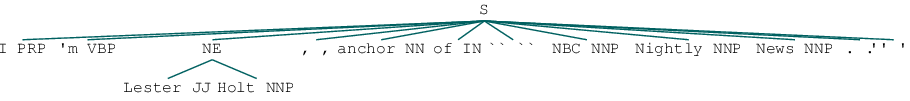

In [62]:
d1chunked_sents = list(d1chunked_sents)
d1chunked_sents[1]

In [63]:
for sent in d1chunked_sents[:50]:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE State/NNP)
(NE Clinton/NNP)
(NE Businessman/NNP Donald/NNP Trump/NNP)
(NE NBC/NNP News/NNP)
(NE Hofstra/NNP University/NNP)
(NE Hempstead/NNP)
(NE New/NNP York/NNP)
(NE Lester/JJ Holt/NNP)
(NE Donald/NNP Trump/NNP)
(NE Hillary/NNP Clinton/NNP)
(NE America/NNP)
(NE America/NNP)
(NE United/NNP States/NNPS)
(NE Hillary/NNP Clinton/NNP)
(NE Republican/NNP)
(NE United/NNP States/NNPS)
(NE Donald/NNP J./NNP Trump/NNP)
(NE CLINTON/NNP)
(NE Donald/NNP)
(NE American/JJ)
(NE America/NNP)
(NE Clinton/NNP)
(NE American/NNP)
(NE CLINTON/NN)
(NE Lester/NNP)
(NE Hofstra/NNP)
(NE Donald/NNP Trump/NNP)
(NE HOLT/NN)
(NE Clinton/NNP)
(NE Mr./NNP Trump/NNP)


**This does a nice job of pulling out the NE's, but it doesn't tell us where they're located in the text unless you look at the trees...**

In [64]:
dir(d1chunked_sents[0][0])

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index']

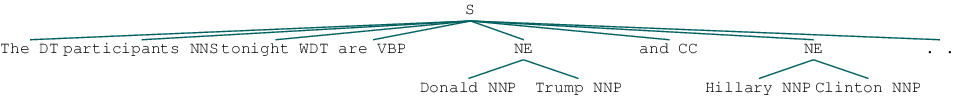

In [69]:
d1chunked_sents[3]

In [75]:
d1chunked_sents[3].set_label('HOLT')

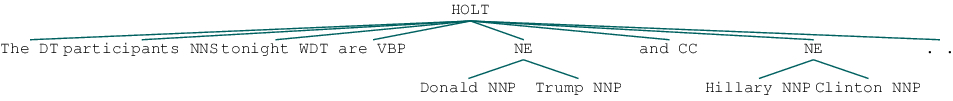

In [76]:
d1chunked_sents[3]

**It's probably not smart to get rid of S as the head label... but maybe it would be helpful to change it to the speaker? There doesn't seem to be a way for me to link the NE's either.**